<a href="https://colab.research.google.com/github/konrad-l/data_science_bootcamp/blob/main/01_wprowadzenie/05_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import bibliotek**

In [ ]:
import numpy as np
import pandas as pd

print(f"Numpy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print("Pandas:", pd.__version__)

Numpy: 1.21.5
Pandas: 1.3.5
Pandas: 1.3.5


**Załadowanie danych**

In [ ]:
def fetch_financial_data(company = "AMZN"):
  """Pobiera dane dotyczące notować spółek na giełdzie 
  wg symboli na serwisie stooq.pl"""
  import pandas_datareader.data as web
  # importowanie biblioteki datareader do odczytu i pobrania danych
  return web.DataReader(name=company, data_source="stooq")

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2022-04-01 to 2017-04-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1260 non-null   float64
 1   High    1260 non-null   float64
 2   Low     1260 non-null   float64
 3   Close   1260 non-null   float64
 4   Volume  1260 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.1 KB


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01,3282.990,3316.540,3246.390,3271.20,2854475
2022-03-31,3328.895,3329.900,3259.070,3259.95,2998289
2022-03-30,3370.190,3379.010,3310.000,3326.02,2808363
2022-03-29,3407.680,3416.630,3357.370,3386.30,3307680
2022-03-28,3299.500,3380.750,3298.000,3379.81,2992691
...,...,...,...,...,...
2017-04-07,899.650,900.090,889.310,894.88,3710922
2017-04-06,913.800,917.190,894.493,898.28,6189311
2017-04-05,910.820,923.720,905.620,909.28,7396854


In [ ]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01,3282.990,3316.54,3246.39,3271.20,2854475
2022-03-31,3328.895,3329.90,3259.07,3259.95,2998289
2022-03-30,3370.190,3379.01,3310.00,3326.02,2808363
2022-03-29,3407.680,3416.63,3357.37,3386.30,3307680
2022-03-28,3299.500,3380.75,3298.00,3379.81,2992691
2022-03-25,3280.000,3307.37,3245.00,3295.47,2454275
2022-03-24,3274.990,3282.37,3201.00,3272.99,2839903
2022-03-23,3274.100,3327.40,3253.74,3268.16,2790593
2022-03-22,3236.110,3323.34,3233.98,3297.78,3204306


In [ ]:
df.tail(5)

,Open,High,Low,Close,Volume
Date,,,,,
2017-04-07,899.65,900.090,889.310,894.88,3710922
2017-04-06,913.80,917.190,894.493,898.28,6189311
2017-04-05,910.82,923.720,905.620,909.28,7396854
2017-04-04,891.50,908.538,890.280,906.83,4937884
2017-04-03,888.00,893.490,885.420,891.51,3422328


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df.columns = [col.lower() for col in df.columns]
df.head()
# zamiana nazw kolun z wielkiej litery na małą literę

,open,high,low,close,volume
Date,,,,,
2022-04-01,3282.990,3316.54,3246.39,3271.20,2854475
2022-03-31,3328.895,3329.90,3259.07,3259.95,2998289
2022-03-30,3370.190,3379.01,3310.00,3326.02,2808363
2022-03-29,3407.680,3416.63,3357.37,3386.30,3307680
2022-03-28,3299.500,3380.75,3298.00,3379.81,2992691


In [ ]:
df.describe()

,open,high,low,close,volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,2199.582916,2223.299287,2172.957001,2198.464111,4.300045e+06
std,857.362136,867.878884,845.865124,856.234300,2.059136e+06
min,887.500000,893.490000,884.490000,884.670000,8.813370e+05
25%,1604.007500,1623.822500,1590.885000,1606.792500,2.912930e+06
50%,1885.455000,1900.475000,1864.750000,1884.440000,3.702774e+06
75%,3162.607550,3195.176625,3121.122575,3158.915000,5.094323e+06
max,3744.000000,3773.078200,3696.792900,3731.410000,1.655260e+07


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1260.0,2.199583e+03,8.573621e+02,887.50,1.604007e+03,1885.455,3.162608e+03,3.744000e+03
high,1260.0,2.223299e+03,8.678789e+02,893.49,1.623822e+03,1900.475,3.195177e+03,3.773078e+03
low,1260.0,2.172957e+03,8.458651e+02,884.49,1.590885e+03,1864.750,3.121123e+03,3.696793e+03
close,1260.0,2.198464e+03,8.562343e+02,884.67,1.606793e+03,1884.440,3.158915e+03,3.731410e+03
volume,1260.0,4.300045e+06,2.059136e+06,881337.00,2.912930e+06,3702773.500,5.094323e+06,1.655260e+07


**Selekcja kolumn**

In [ ]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2022-04-01,3282.990,3316.54,3246.39,3271.20,2854475
2022-03-31,3328.895,3329.90,3259.07,3259.95,2998289
2022-03-30,3370.190,3379.01,3310.00,3326.02,2808363
2022-03-29,3407.680,3416.63,3357.37,3386.30,3307680
2022-03-28,3299.500,3380.75,3298.00,3379.81,2992691
2022-03-25,3280.000,3307.37,3245.00,3295.47,2454275
2022-03-24,3274.990,3282.37,3201.00,3272.99,2839903
2022-03-23,3274.100,3327.40,3253.74,3268.16,2790593
2022-03-22,3236.110,3323.34,3233.98,3297.78,3204306


In [ ]:
df["open"]

Date
2022-04-01    3282.990
2022-03-31    3328.895
2022-03-30    3370.190
2022-03-29    3407.680
2022-03-28    3299.500
2022-03-25    3280.000
2022-03-24    3274.990
2022-03-23    3274.100
2022-03-22    3236.110
2022-03-21    3222.415
Name: open, dtype: float64

In [ ]:
df.open

Date
2022-04-01    3282.990
2022-03-31    3328.895
2022-03-30    3370.190
2022-03-29    3407.680
2022-03-28    3299.500
2022-03-25    3280.000
2022-03-24    3274.990
2022-03-23    3274.100
2022-03-22    3236.110
2022-03-21    3222.415
Name: open, dtype: float64

In [ ]:
df[["open"]]

,open
Date,
2022-04-01,3282.990
2022-03-31,3328.895
2022-03-30,3370.190
2022-03-29,3407.680
2022-03-28,3299.500
2022-03-25,3280.000
2022-03-24,3274.990
2022-03-23,3274.100
2022-03-22,3236.110


In [ ]:
df[["open", "close"]]

,open,close
Date,,
2022-04-01,3282.990,3271.20
2022-03-31,3328.895,3259.95
2022-03-30,3370.190,3326.02
2022-03-29,3407.680,3386.30
2022-03-28,3299.500,3379.81
2022-03-25,3280.000,3295.47
2022-03-24,3274.990,3272.99
2022-03-23,3274.100,3268.16
2022-03-22,3236.110,3297.78


In [ ]:
df.iloc[:, 0]

Date
2022-04-01    3282.990
2022-03-31    3328.895
2022-03-30    3370.190
2022-03-29    3407.680
2022-03-28    3299.500
2022-03-25    3280.000
2022-03-24    3274.990
2022-03-23    3274.100
2022-03-22    3236.110
2022-03-21    3222.415
Name: open, dtype: float64

In [ ]:
df.iloc[:, [0, 3]]
# metodą iloc wyrzucamy dane dla wszystkich wierszy i kolumny "open" i "close"

,open,close
Date,,
2022-04-01,3282.990,3271.20
2022-03-31,3328.895,3259.95
2022-03-30,3370.190,3326.02
2022-03-29,3407.680,3386.30
2022-03-28,3299.500,3379.81
2022-03-25,3280.000,3295.47
2022-03-24,3274.990,3272.99
2022-03-23,3274.100,3268.16
2022-03-22,3236.110,3297.78


In [ ]:
df.iloc[:, 3:5]

,close,volume
Date,,
2022-04-01,3271.20,2854475
2022-03-31,3259.95,2998289
2022-03-30,3326.02,2808363
2022-03-29,3386.30,3307680
2022-03-28,3379.81,2992691
2022-03-25,3295.47,2454275
2022-03-24,3272.99,2839903
2022-03-23,3268.16,2790593
2022-03-22,3297.78,3204306


In [ ]:
df.iloc[:, -1]

Date
2022-04-01    2854475
2022-03-31    2998289
2022-03-30    2808363
2022-03-29    3307680
2022-03-28    2992691
2022-03-25    2454275
2022-03-24    2839903
2022-03-23    2790593
2022-03-22    3204306
2022-03-21    3326876
Name: volume, dtype: int64

In [ ]:
df.iloc[:, [-1]]

,volume
Date,
2022-04-01,2854475
2022-03-31,2998289
2022-03-30,2808363
2022-03-29,3307680
2022-03-28,2992691
2022-03-25,2454275
2022-03-24,2839903
2022-03-23,2790593
2022-03-22,3204306


In [ ]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2022-04-01,3246.39,3271.20,2854475
2022-03-31,3259.07,3259.95,2998289
2022-03-30,3310.00,3326.02,2808363
2022-03-29,3357.37,3386.30,3307680
2022-03-28,3298.00,3379.81,2992691
2022-03-25,3245.00,3295.47,2454275
2022-03-24,3201.00,3272.99,2839903
2022-03-23,3253.74,3268.16,2790593
2022-03-22,3233.98,3297.78,3204306


**Selekcja wierszy**

In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2022-04-01,3282.990,3316.54,3246.39,3271.20,2854475
2022-03-31,3328.895,3329.90,3259.07,3259.95,2998289
2022-03-30,3370.190,3379.01,3310.00,3326.02,2808363
2022-03-29,3407.680,3416.63,3357.37,3386.30,3307680
2022-03-28,3299.500,3380.75,3298.00,3379.81,2992691
2022-03-25,3280.000,3307.37,3245.00,3295.47,2454275
2022-03-24,3274.990,3282.37,3201.00,3272.99,2839903
2022-03-23,3274.100,3327.40,3253.74,3268.16,2790593
2022-03-22,3236.110,3323.34,3233.98,3297.78,3204306


In [ ]:
df.iloc[0]

open         3282.99
high         3316.54
low          3246.39
close        3271.20
volume    2854475.00
Name: 2022-04-01 00:00:00, dtype: float64

In [ ]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2022-04-01,3282.990,3316.54,3246.39,3271.20,2854475
2022-03-31,3328.895,3329.90,3259.07,3259.95,2998289
2022-03-30,3370.190,3379.01,3310.00,3326.02,2808363


In [ ]:
df.loc["2022-04-01"]

,open,high,low,close,volume
Date,,,,,
2022-04-01,3282.99,3316.54,3246.39,3271.2,2854475


In [ ]:
df.loc["2022-03-22": "2022-04-01"]

,open,high,low,close,volume
Date,,,,,
2022-04-01,3282.990,3316.54,3246.39,3271.20,2854475
2022-03-31,3328.895,3329.90,3259.07,3259.95,2998289
2022-03-30,3370.190,3379.01,3310.00,3326.02,2808363
2022-03-29,3407.680,3416.63,3357.37,3386.30,3307680
2022-03-28,3299.500,3380.75,3298.00,3379.81,2992691
2022-03-25,3280.000,3307.37,3245.00,3295.47,2454275
2022-03-24,3274.990,3282.37,3201.00,3272.99,2839903
2022-03-23,3274.100,3327.40,3253.74,3268.16,2790593


**Obliczanie nowych kolumn**

In [ ]:
df = fetch_financial_data("MSFT")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2022-04-01 to 2017-04-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1260 non-null   float64
 1   High    1260 non-null   float64
 2   Low     1260 non-null   float64
 3   Close   1260 non-null   float64
 4   Volume  1260 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.1 KB


In [ ]:
df = fetch_financial_data("UBER")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2022-04-01 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    731 non-null    float64
 1   High    731 non-null    float64
 2   Low     731 non-null    float64
 3   Close   731 non-null    float64
 4   Volume  731 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 34.3 KB


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01,35.68,36.4800,35.400,35.98,16793293
2022-03-31,36.50,36.7300,35.370,35.68,20608652
2022-03-30,36.66,37.0885,36.205,36.58,22306544
2022-03-29,35.57,37.4500,35.570,37.19,37969049
2022-03-28,34.14,34.9100,33.730,34.77,22175227


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,731.000000,731.000000,731.000000,731.000000,7.310000e+02
mean,40.127371,40.922596,39.225907,40.071163,2.474013e+07
std,9.171041,9.230843,9.047277,9.113366,1.687887e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,32.785000,33.460000,32.050000,32.810000,1.425195e+07
50%,38.880000,39.670000,37.750000,38.490000,2.079540e+07
75%,46.535000,47.465000,45.815000,46.405000,3.018425e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01,35.68,36.4800,35.400,35.98,16793293
2022-03-31,36.50,36.7300,35.370,35.68,20608652
2022-03-30,36.66,37.0885,36.205,36.58,22306544


In [ ]:
df["Average"] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2022-04-01,35.68,36.4800,35.400,35.98,16793293,35.830
2022-03-31,36.50,36.7300,35.370,35.68,20608652,36.090
2022-03-30,36.66,37.0885,36.205,36.58,22306544,36.620
2022-03-29,35.57,37.4500,35.570,37.19,37969049,36.380
2022-03-28,34.14,34.9100,33.730,34.77,22175227,34.455


In [ ]:
# zmiana ustawienia index'ów
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [ ]:
df[["Close"]].shift(1)
# przesunięcie o 1 wiersz w dół
# analogicznie np. 3 oznacza, że 3 wiersze w dół

,Close
Date,
2019-05-10,NaN
2019-05-13,41.57
2019-05-14,37.10
2019-05-15,39.96
2019-05-16,41.29
...,...
2022-03-28,34.06
2022-03-29,34.77
2022-03-30,37.19


In [ ]:
df["Close_shift"] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [ ]:
df.Close / df.Close_shift - 1

Date
2019-05-10         NaN
2019-05-13   -0.107529
2019-05-14    0.077089
2019-05-15    0.033283
2019-05-16    0.041414
                ...   
2022-03-28    0.020846
2022-03-29    0.069600
2022-03-30   -0.016402
2022-03-31   -0.024604
2022-04-01    0.008408
Length: 731, dtype: float64

In [ ]:
# moje przeliczenie wzrostu/ spadku ceny
(df.Close_shift-df.Close)/df.Close_shift

Date
2019-05-10         NaN
2019-05-13    0.107529
2019-05-14   -0.077089
2019-05-15   -0.033283
2019-05-16   -0.041414
                ...   
2022-03-28   -0.020846
2022-03-29   -0.069600
2022-03-30    0.016402
2022-03-31    0.024604
2022-04-01   -0.008408
Length: 731, dtype: float64

In [ ]:
df["Daily Change"] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [ ]:
df["Daily_Change"] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily Change,Daily_Change
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414


In [ ]:
df["Daily Change %"] = (df.Close / df.Close_shift - 1)*100
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily Change,Daily_Change,Daily Change %
Date,,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529,-10.752947
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089,7.708895
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283,3.328328
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414,4.141439


In [ ]:
# usuwanie kolumny
del df["Daily Change %"]
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily Change,Daily_Change
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414


In [ ]:
del df["Daily Change"]
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [ ]:
df.Daily_Change.min()

-0.21628767847699626

In [ ]:
df.Daily_Change.max()

0.3825910931174088

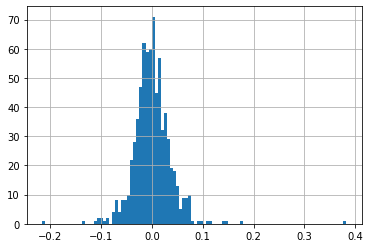

In [ ]:
df.Daily_Change.hist(bins=100)

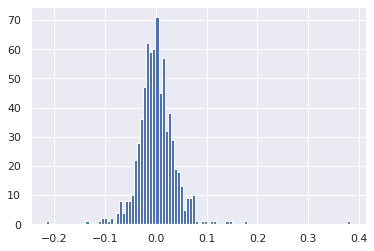

In [ ]:
import seaborn as sns
sns.set()
df.Daily_Change.hist(bins=100)

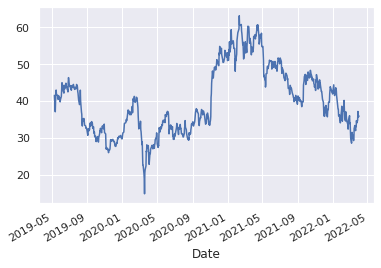

In [ ]:
df.Close.plot()

**Filtrowanie danych**

In [ ]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-03-28,34.14,34.9100,33.730,34.77,22175227,34.455,34.06,0.020846
2022-03-29,35.57,37.4500,35.570,37.19,37969049,36.380,34.77,0.069600
2022-03-30,36.66,37.0885,36.205,36.58,22306544,36.620,37.19,-0.016402


In [ ]:
# usuwanie wierszy tam gdzie "Daily_Change" jest dodatni
df.Daily_Change > 0

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15     True
2019-05-16     True
              ...  
2022-03-28     True
2022-03-29     True
2022-03-30    False
2022-03-31    False
2022-04-01     True
Name: Daily_Change, Length: 731, dtype: bool

In [ ]:
df[df.Daily_Change > 0]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2022-03-22,31.93,33.60,31.84,33.35,21852813,32.640,31.98,0.042839
2022-03-24,34.74,34.95,33.44,34.70,52533577,34.720,33.06,0.049607
2022-03-28,34.14,34.91,33.73,34.77,22175227,34.455,34.06,0.020846


In [ ]:
df[df.Daily_Change < 0]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.2900,41.270,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.6800,39.460,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.2400,41.250,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.2800,40.500,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2022-03-21,32.82,32.8200,31.250,31.98,35200551,32.400,33.36,-0.041367
2022-03-23,32.71,33.6800,32.570,33.06,19024734,32.885,33.35,-0.008696
2022-03-25,34.55,34.9200,33.550,34.06,28078801,34.305,34.70,-0.018444


In [ ]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2022-03-22,31.93,33.60,31.84,33.35,21852813,32.640,31.98,0.042839
2022-03-24,34.74,34.95,33.44,34.70,52533577,34.720,33.06,0.049607
2022-03-28,34.14,34.91,33.73,34.77,22175227,34.455,34.06,0.020846


In [ ]:
# df_positive.mean()
df_positive.Daily_Change.mean()

0.027247703141380534

In [ ]:
df_negative = df[df.Daily_Change < 0]
df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.2900,41.270,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.6800,39.460,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.2400,41.250,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.2800,40.500,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2022-03-21,32.82,32.8200,31.250,31.98,35200551,32.400,33.36,-0.041367
2022-03-23,32.71,33.6800,32.570,33.06,19024734,32.885,33.35,-0.008696
2022-03-25,34.55,34.9200,33.550,34.06,28078801,34.305,34.70,-0.018444


In [ ]:
df_negative.Daily_Change.mean()

-0.024421568126394143

In [ ]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2022-03-28    False
2022-03-29    False
2022-03-30    False
2022-03-31    False
2022-04-01    False
Length: 731, dtype: bool

In [ ]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780


In [ ]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112


In [ ]:
df.index > "2019-11-01"

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,

In [ ]:
df[df.index > "2019-11-01"]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-04,31.45,31.7500,30.120,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.3000,27.970,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.5500,25.580,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.4200,26.450,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.6200,26.915,27.01,45263118,27.245,27.38,-0.013514
...,...,...,...,...,...,...,...,...
2022-03-28,34.14,34.9100,33.730,34.77,22175227,34.455,34.06,0.020846
2022-03-29,35.57,37.4500,35.570,37.19,37969049,36.380,34.77,0.069600
2022-03-30,36.66,37.0885,36.205,36.58,22306544,36.620,37.19,-0.016402


In [ ]:
df[(df.index >= "2019-11-01") & (df.index < "2019-11-15")]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.000375


In [ ]:
df[(df.index >= "2019-11-01") | (df.index < "2019-11-15")]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-03-28,34.14,34.9100,33.730,34.77,22175227,34.455,34.06,0.020846
2022-03-29,35.57,37.4500,35.570,37.19,37969049,36.380,34.77,0.069600
2022-03-30,36.66,37.0885,36.205,36.58,22306544,36.620,37.19,-0.016402


In [ ]:
df[(df.index == "2019-11-01") | (df.index == "2019-11-07")]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.41,31.50,-0.004127
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.09,26.94,0.016333


In [ ]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-03-28,34.14,34.9100,33.730,34.77,22175227,34.455,34.06,0.020846
2022-03-29,35.57,37.4500,35.570,37.19,37969049,36.380,34.77,0.069600
2022-03-30,36.66,37.0885,36.205,36.58,22306544,36.620,37.19,-0.016402


In [ ]:
# wytypowanie wyłącznie miesiąca maja
df.index.month == 5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.000,45.0000,41.0600,41.57,186322536,41.7850,NaN,NaN
2019-05-13,38.790,39.2400,36.0800,37.10,79442420,37.9450,41.57,-0.107529
2019-05-14,38.310,39.9600,36.8500,39.96,46661147,39.1350,37.10,0.077089
2019-05-15,39.370,41.8800,38.9500,41.29,36086065,40.3300,39.96,0.033283
2019-05-16,41.480,44.0600,41.2500,43.00,38115524,42.2400,41.29,0.041414
2019-05-17,41.980,43.2900,41.2700,41.91,20225687,41.9450,43.00,-0.025349
2019-05-20,41.190,41.6800,39.4600,41.59,29222330,41.3900,41.91,-0.007635
2019-05-21,42.000,42.2400,41.2500,41.50,10802851,41.7500,41.59,-0.002164
2019-05-22,41.050,41.2800,40.5000,41.25,9089469,41.1500,41.50,-0.006024


In [ ]:
df[df.index.year == 2020]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-01-02,29.94,31.000,29.79,30.99,20583240,30.465,29.74,0.042031
2020-01-03,30.62,31.430,30.48,31.37,18831450,30.995,30.99,0.012262
2020-01-06,31.01,32.060,31.00,31.58,21215865,31.295,31.37,0.006694
2020-01-07,31.79,32.840,31.36,32.81,30268966,32.300,31.58,0.038949
2020-01-08,32.73,34.520,32.46,33.93,43955449,33.330,32.81,0.034136
...,...,...,...,...,...,...,...,...
2020-12-24,53.60,53.625,52.29,52.88,6316761,53.240,53.71,-0.015453
2020-12-28,53.02,53.130,51.56,51.97,12058981,52.495,52.88,-0.017209
2020-12-29,52.33,52.990,51.47,52.27,10140561,52.300,51.97,0.005773


In [ ]:
df[df.index.day == 7]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-06-07,44.920,45.6700,44.1300,44.16,12654670,44.5400,44.92,-0.016919
2019-08-07,39.060,39.9900,38.3200,39.70,8896039,39.3800,39.15,0.014049
2019-10-07,30.620,30.7500,29.8300,30.37,10151451,30.4950,29.67,0.023593
2019-11-07,26.800,27.4200,26.4500,27.38,65949472,27.0900,26.94,0.016333
2020-01-07,31.790,32.8400,31.3600,32.81,30268966,32.3000,31.58,0.038949
2020-02-07,39.980,41.0000,38.8600,40.63,112325800,40.3050,37.09,0.095444
2020-04-07,27.950,28.1100,25.5000,25.74,36433762,26.8450,25.99,-0.009619
2020-05-07,29.600,31.6500,29.5800,30.93,62229496,30.2650,27.82,0.111790
2020-07-07,32.460,33.5598,32.3900,32.82,34874658,32.6400,32.52,0.009225
